# **남자 테니스 그랜드 슬램 우승자 데이터 분석**<br>
## **빅데이터 프로젝트**
### **201844019 오민석**

한글 설치

In [57]:
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'})

In [55]:
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

### **최신 데이터 추가**

In [ ]:
new_data = pd.DataFrame({
    'YEAR': [2023, 2023, 2023],
    'TOURNAMENT': ['U.S. Open', 'Wimbledon', 'French Open'],
    'WINNER': ['Novak Djokovic', 'Carlos Alcaraz','Novak Djokovic'],
    'RUNNER-UP': ['Daniil Medvedev', 'Novak Djokovic', 'Casper Rudd'],
    'WINNER_NATIONALITY': ['Serbian', 'Spanish','Serbian'],
    'WINNER_ATP_RANKING': [1, 2, 1],
    'RUNNER-UP_ATP_RANKING': [3, 1, 7],
    'WINNER_LEFT_OR_RIGHT_HANDED': ['right', 'right','right'],
    'TOURNAMENT_SURFACE': ['DecoTurf - outdoors', 'Grass / Outdoor', 'Clay'],
    'WINNER_PRIZE': [3000000, 2350000, 2500000]
})
df = pd.read_csv('/content/tennis.csv')
df = pd.concat([new_data, df]).reset_index(drop=True)

### **우승 당시 나이 데이터 추가**

In [ ]:
year_data = {
'Novak Djokovic': 1987, 'Carlos Alcaraz': 2003, 'Rafael Nadal': 1986, 'Daniil Medvedev': 1996, 'Dominic Thiem': 1993, 'Roger Federer': 1981, 'Stan Wawrinka': 1985, 'Andy Murray': 1987, 'Marin Cilic': 1988, 'Juan Martin del Potro': 1988, 'Marat Safin': 1980, 'Gaston Gaudio': 1978, 'Andy Roddick': 1982, 'Juan Carlos Ferrero': 1980, 'Andre Agassi': 1970, 'Pete Sampras': 1971, 'Lleyton Hewitt': 1981, 'Albert Costa': 1975, 'Thomas Johannson': 1975, 'Goran Ivanisevic': 1971, 'Gustavo Kuerten': 1976, 'Yevgeny Kafelnikov': 1974, 'Patrick Rafter': 1972, 'Carlos Moya': 1976, 'Petr Korda': 1968, 'Richard Krajicek': 1971, 'Boris Becker': 1967, 'Thomas Muster': 1967, 'Sergi Bruguera': 1971, 'Jim Courier': 1970, 'Stefan Edberg': 1966, 'Michael Stich': 1968, 'Andres Gomez': 1960, 'Ivan Lendl': 1960, 'Michael Chang': 1972, 'Mats Wilander': 1964, 'Pat Cash': 1965, 'John McEnroe': 1959, 'Jimmy Connors': 1952, 'Yannick Noah': 1960, 'Johan Kriek': 1958, 'Bjorn Borg': 1956, 'Brian Teacher': 1954, 'Guillermo Vilas': 1952, 'Vitas Gerulaitis': 1954, 'Roscoe Tanner': 1951, 'Adriano Panatta': 1950, 'Mark Edmondson': 1954, 'Manuel Orantes': 1949, 'Arthur Ashe': 1943, 'John Newcombe': 1944, 'Jan Kodes': 1946, 'Ilie Nastase': 1946, 'Stan Smith': 1946, 'Andres Gimeno': 1937, 'Ken Rosewall': 1934, 'Rod Laver': 1938, 'Bill Bowrey': 1943, 'Roy Emerson': 1936, 'Fred Stolle': 1938, 'Manuel Santana': 1938, 'Tony Roche': 1945, 'Rafael Osuna': 1938, 'C.R. McKinley': 1941, 'Neale Fraser': 1933, 'Nicola Pietrangeli': 1933, 'Alejandro Olmedo': 1937, 'Alex Olmedo': 1936, 'Ashley J. Cooper': 1936, 'Mervyn Rose': 1930, 'Malcolm J. Anderson': 1935, 'Lewis Hoad': 1934, 'Sven Davidson': 1928, 'Tony Trabert': 1930, 'E. Victor Seixas Jr.': 1923, 'Jaroslav Drobny': 1921, 'Frank Sedgman': 1927, 'Ken McGregor': 1921, 'R. Savitt': 1927, 'Dick Savitt': 1927, 'Arthur Larsen': 1925, 'J.E. Patty': 1924, 'Budge Patty': 1924,
}
df['WINNER_BIRTH'] = df['WINNER'].map(year_data)

#우승 당시 나이: 해당 년도 - 태어난 년도
df['WINNER_AGE'] = df['YEAR'] - df['WINNER_BIRTH']
df.drop(['WINNER_BIRTH'],axis=1,inplace=True)

### **대회명 데이터 전처리**

In [ ]:
df['TOURNAMENT'].value_counts()

U.S. Open                74
French Open              74
Wimbledon                73
Australian Open          72
Australian Open (Dec)     1
Australian Open (Jan)     1
Name: TOURNAMENT, dtype: int64

Australian Open (Dec), Australian Open (Jan) -> Australian Open 으로 변경

In [ ]:
df["TOURNAMENT"].replace(to_replace=['Australian Open (Dec)','Australian Open (Jan)'],value='Australian Open',inplace=True)

df['TOURNAMENT'].value_counts()

U.S. Open          74
French Open        74
Australian Open    74
Wimbledon          73
Name: TOURNAMENT, dtype: int64

### **코트 종류 데이터 전처리**

In [ ]:
df["TOURNAMENT_SURFACE"].value_counts()

Clay                     74
Grass / Outdoor          73
DecoTurf - outdoors      46
Grass                    38
outdoors                 25
Rebound Ace              20
Plexicushion Prestige    16
Clay - outdoors           3
Name: TOURNAMENT_SURFACE, dtype: int64

DecoTurf - outdoors,outdoors,Rebound Ace,Plexicushion Prestige -> Hard Court로 통합<br>
Grass / Outdoor -> Grass로 변경<br>
Clay - outdoors -> Clay로 변경

In [ ]:
df["TOURNAMENT_SURFACE"].replace(to_replace=['DecoTurf - outdoors','outdoors','Rebound Ace','Plexicushion Prestige'],value='Hard Court',inplace=True)

df["TOURNAMENT_SURFACE"].replace(to_replace=['Grass / Outdoor','Clay - outdoors'],value=['Grass','Clay'],inplace=True)

df["TOURNAMENT_SURFACE"].value_counts()

Grass         111
Hard Court    107
Clay           77
Name: TOURNAMENT_SURFACE, dtype: int64

### **우승자 국적 데이터 전처리**

In [ ]:
df['WINNER_NATIONALITY'].value_counts()

American          67
Australian        67
Spanish           34
Swedish           26
Serbian           24
Swiss             23
Czechoslovakia     8
German             7
Argentine          6
Russian            5
Czech              4
Italian            3
Brazilian          3
British            3
Czechoslovak       3
Croatian           2
Austrian           2
Romanian           2
peruvian           2
Dutch              1
Ecuadorian         1
French             1
Mexican            1
Name: WINNER_NATIONALITY, dtype: int64

Czechoslovak, Czechoslovakia -> Czech로 변경

In [ ]:
df['WINNER_NATIONALITY'].replace(to_replace=['Czechoslovak','Czechoslovakia'],value='Czech',inplace=True)

df['WINNER_NATIONALITY'].value_counts()

American      67
Australian    67
Spanish       34
Swedish       26
Serbian       24
Swiss         23
Czech         15
German         7
Argentine      6
Russian        5
British        3
Brazilian      3
Italian        3
Croatian       2
Austrian       2
Romanian       2
peruvian       2
Dutch          1
Ecuadorian     1
French         1
Mexican        1
Name: WINNER_NATIONALITY, dtype: int64

### 전처리 된 데이터 저장

In [ ]:
df.to_csv('final_tennis.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         295 non-null    int64  
 1   TOURNAMENT                   295 non-null    object 
 2   WINNER                       295 non-null    object 
 3   RUNNER-UP                    295 non-null    object 
 4   WINNER_NATIONALITY           295 non-null    object 
 5   WINNER_ATP_RANKING           66 non-null     float64
 6   RUNNER-UP_ATP_RANKING        67 non-null     float64
 7   WINNER_LEFT_OR_RIGHT_HANDED  295 non-null    object 
 8   TOURNAMENT_SURFACE           295 non-null    object 
 9   WINNER_PRIZE                 220 non-null    float64
 10  WINNER_AGE                   295 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 25.5+ KB


In [ ]:
df.describe()

,YEAR,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_PRIZE,WINNER_AGE
count,295.000000,66.000000,67.000000,2.200000e+02,295.000000
mean,1986.355932,1.954545,3.880597,1.081133e+06,25.850847
std,21.349985,1.440425,3.599337,1.171278e+06,4.190789
min,1950.000000,1.000000,1.000000,2.000000e+03,17.000000
25%,1968.000000,1.000000,2.000000,1.047188e+05,23.000000
50%,1986.000000,1.000000,3.000000,6.225000e+05,25.000000
75%,2005.000000,2.000000,5.000000,1.767848e+06,28.000000
max,2023.000000,9.000000,25.000000,4.538000e+06,38.000000


## **우승 및 준우승 총합 횟수 상위 15명 시각화**

In [ ]:
#우승 및 준우승 데이터 합치기
WINNER_RUNNER_merged = pd.merge(df['RUNNER-UP'].value_counts().reset_index(), df['WINNER'].value_counts().reset_index(), on = 'index')
WINNER_RUNNER_merged['Total_Win'] = WINNER_RUNNER_merged['RUNNER-UP'] + WINNER_RUNNER_merged['WINNER']
WINNER_RUNNER_merged = WINNER_RUNNER_merged.sort_values('Total_Win', ascending = False)


win = WINNER_RUNNER_merged.iloc[:15] #상위 15명 지정
win['Total_Win'] = win['Total_Win'].astype(int)

fig = go.Figure(data = [
    go.Line(x = win['index'], y = win['RUNNER-UP'], line_color = 'red', name = "준우승"),
    go.Line(x = win['index'], y = win['WINNER'], line_color = 'blue',name="우승"),
    go.Line(x = win['index'], y = win['Total_Win'], line_color = 'green', name='총합 횟수')
])

fig.update_layout(
    xaxis_title="선수명",
    yaxis_title="우승 및 준우승 횟수",
    font = dict(size=17),
    title = '역대 우승 및 준우승 횟수 총합')

fig.show()

<ipython-input-43-59616fc275e7>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## **각 대회 별 우승 횟수 분석**

In [54]:
tournament = df.groupby(['TOURNAMENT','WINNER']).size().reset_index()
tournament = tournament[tournament['WINNER'].isin(win['index'])]

AO = tournament[tournament['TOURNAMENT'] == 'Australian Open'].sort_values(0, ascending = False)
FO = tournament[tournament['TOURNAMENT'] == 'French Open'].sort_values(0, ascending = False)
UO = tournament[tournament['TOURNAMENT'] == 'U.S. Open'].sort_values(0, ascending = False)
WB = tournament[tournament['TOURNAMENT'] == 'Wimbledon'].sort_values(0, ascending = False)

new = pd.concat([AO,FO,UO,WB])

new.columns = ['TOURNAMENT', 'WINNER', 'COUNT']

color = ['skyblue', 'brown', 'navy', 'green']

fig = px.scatter(new, x = 'WINNER', y = 'COUNT', size = 'COUNT', hover_name = 'TOURNAMENT', color = 'TOURNAMENT',
          color_discrete_sequence=color)

fig.update_layout(
    xaxis_title="선수명",
    yaxis_title="우승횟수",
    font = dict(size=17),
    title = '각 대회별 우승 횟수')

fig.show()

## **코트 종류 별 우승 분석**

In [64]:
surface = df.groupby(['TOURNAMENT_SURFACE','WINNER']).size().reset_index()
surface = surface[surface['WINNER'].isin(win['index'])]

GC = surface[surface['TOURNAMENT_SURFACE'] == 'Grass'].sort_values(0, ascending = False)
HC = surface[surface['TOURNAMENT_SURFACE'] == 'Hard Court'].sort_values(0, ascending = False)
CC = surface[surface['TOURNAMENT_SURFACE'] == 'Clay'].sort_values(0, ascending = False)

new = pd.concat([GC,HC,CC])
new.columns = ['TOURNAMENT_SURFACE', 'WINNER', 'COUNT']

color = ['green', 'blue', 'brown']

fig = px.scatter(new, x = 'WINNER', y = 'COUNT', size = 'COUNT', hover_name = 'TOURNAMENT_SURFACE', color = 'TOURNAMENT_SURFACE',
          color_discrete_sequence=color)

fig.update_layout(
    xaxis_title="선수명",
    yaxis_title="우승횟수",
    font = dict(size=17),
    title = '코트종류 별 우승횟수')

fig.show()

## **대회 별 오른손, 왼손 잡이 우승 횟수**

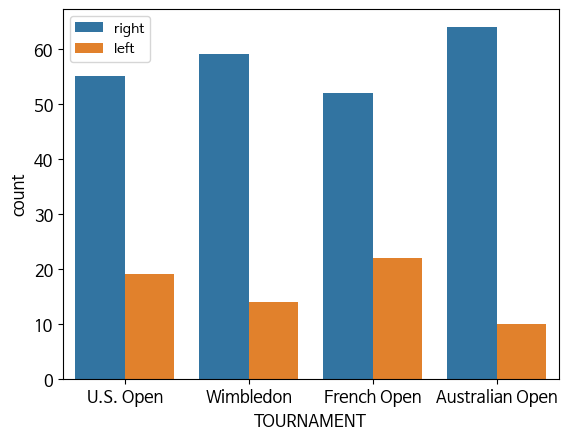

In [58]:
sns.countplot(x='TOURNAMENT',hue = 'WINNER_LEFT_OR_RIGHT_HANDED',data = df)
plt.legend(loc='upper left', prop={'size':10})
plt.show()

## **선수 나이 별 우승 횟수 분석**

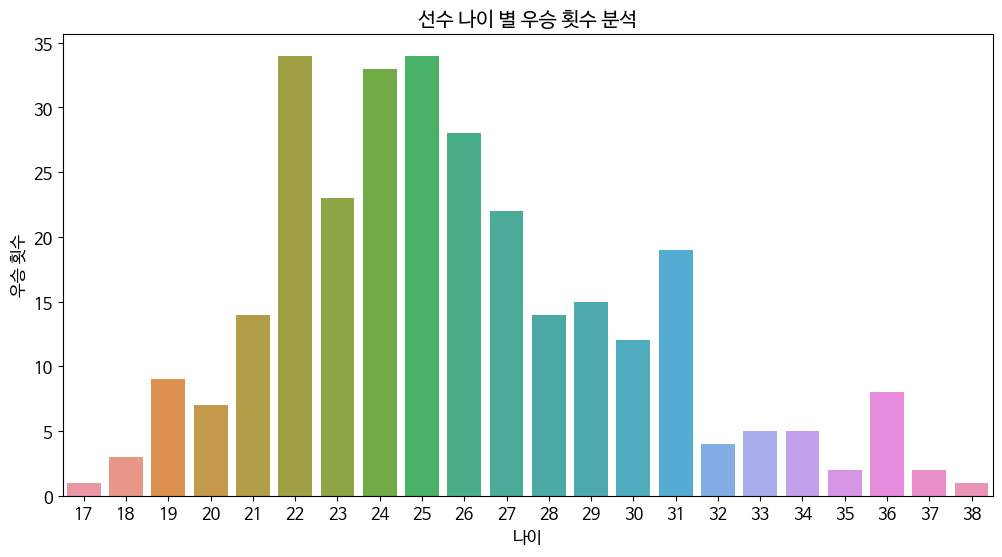

In [65]:
winner_counts = df['WINNER_AGE'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=winner_counts.index, y=winner_counts.values)
plt.title('선수 나이 별 우승 횟수 분석')
plt.xlabel('나이')
plt.ylabel('우승 횟수')
plt.xticks(rotation=0) # x축 레이블 회전 제거
plt.show()

## **ATP 랭킹 별 우승 및 준우승 분석**

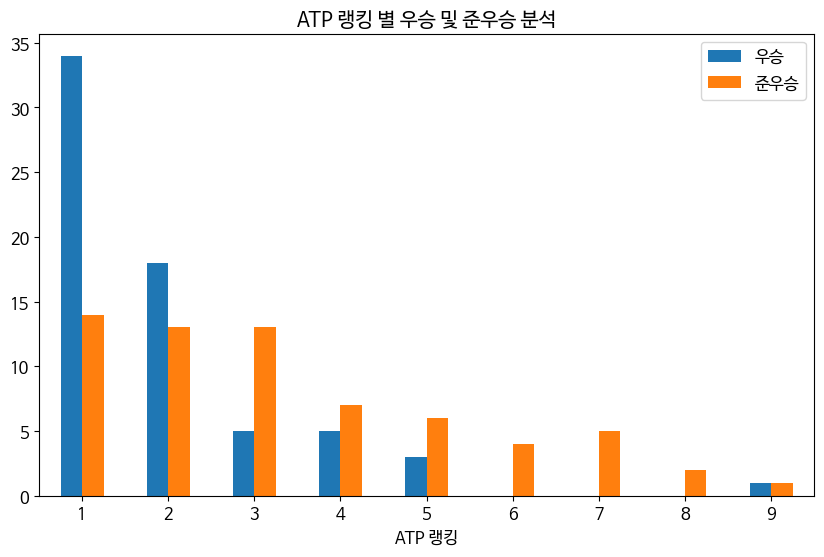

In [60]:
# 랭킹 1위부터 10위까지의 선수들의 우승 횟수 계산
win_counts = df[df['WINNER_ATP_RANKING'].between(1, 10)]['WINNER_ATP_RANKING'].value_counts().sort_index()

# 랭킹 1위부터 10위까지의 선수들의 준우승 횟수 계산
runner_up_counts = df[df['RUNNER-UP_ATP_RANKING'].between(1, 10)]['RUNNER-UP_ATP_RANKING'].value_counts().sort_index()

df_win_runner_up = pd.DataFrame({
    'ATP랭킹': range(1, 10),
    '우승': win_counts,
    '준우승': runner_up_counts
})

df_win_runner_up.plot(x='ATP랭킹', y=['우승', '준우승'], kind='bar', figsize=(10, 6))

plt.title('ATP 랭킹 별 우승 및 준우승 분석')
plt.xlabel('ATP 랭킹')
plt.xticks(rotation=0)  # x축 레이블 회전 제거
plt.show()

## **우승자 나이별 ATP 랭킹 빈도 분석**

<ipython-input-61-a16a15b8ee43>:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



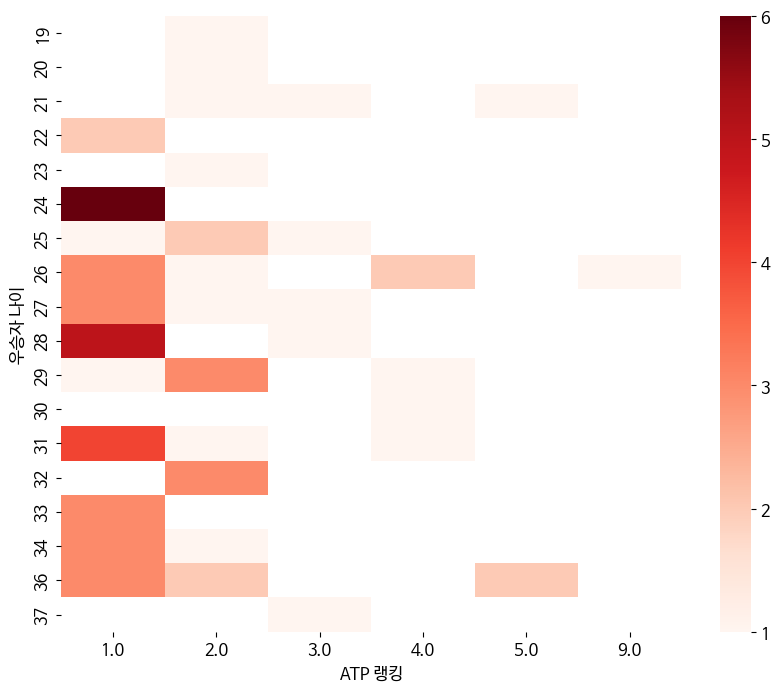

In [61]:
df1 = df.dropna(subset=['WINNER_ATP_RANKING', 'WINNER_AGE'])
frequency = df1.groupby(['WINNER_AGE', 'WINNER_ATP_RANKING']).size().reset_index(name='frequency')

pivot = frequency.pivot('WINNER_AGE', 'WINNER_ATP_RANKING', 'frequency')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot, cmap='Reds')
plt.xlabel('ATP 랭킹')
plt.ylabel('우승자 나이')
plt.show()

## **대회 별 우승 상금 추이**

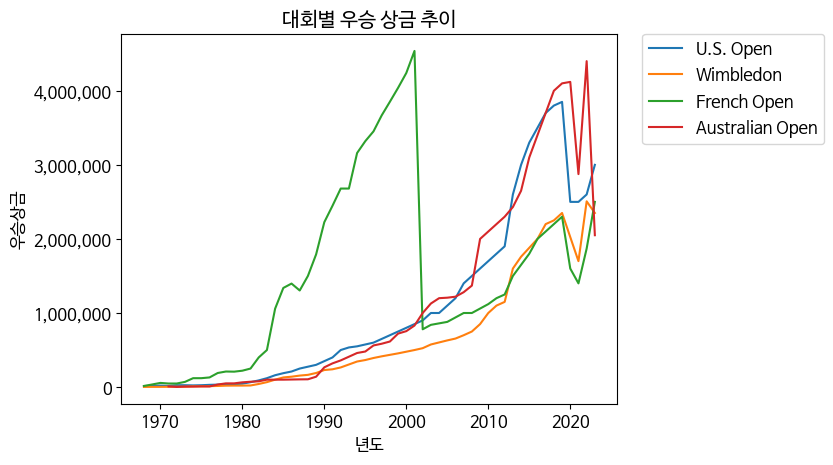

In [62]:
import matplotlib.ticker as ticker

df2 = df.dropna(subset=['WINNER_PRIZE'])

sns.lineplot(x='YEAR', y='WINNER_PRIZE', hue='TOURNAMENT', data=df2)

# y축을 통화 형식으로 변환
formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('대회별 우승 상금 추이')
plt.xlabel('년도')
plt.ylabel('우승상금')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## **우승자 별 국적 분석**

In [ ]:
nationality = df['WINNER_NATIONALITY'].value_counts()[:10] #상위 10개 국적만
fig = px.pie(values=nationality.values,
             names=nationality.index,
             title= "우승자 별 국적 분석",)
fig.update_traces(textinfo='label+percent', textfont_size=15,)

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='white'
fig.update_layout(font=dict(size=18))
fig.show()

## **시대 및 대회 별 우승자 국적 분포**

[]

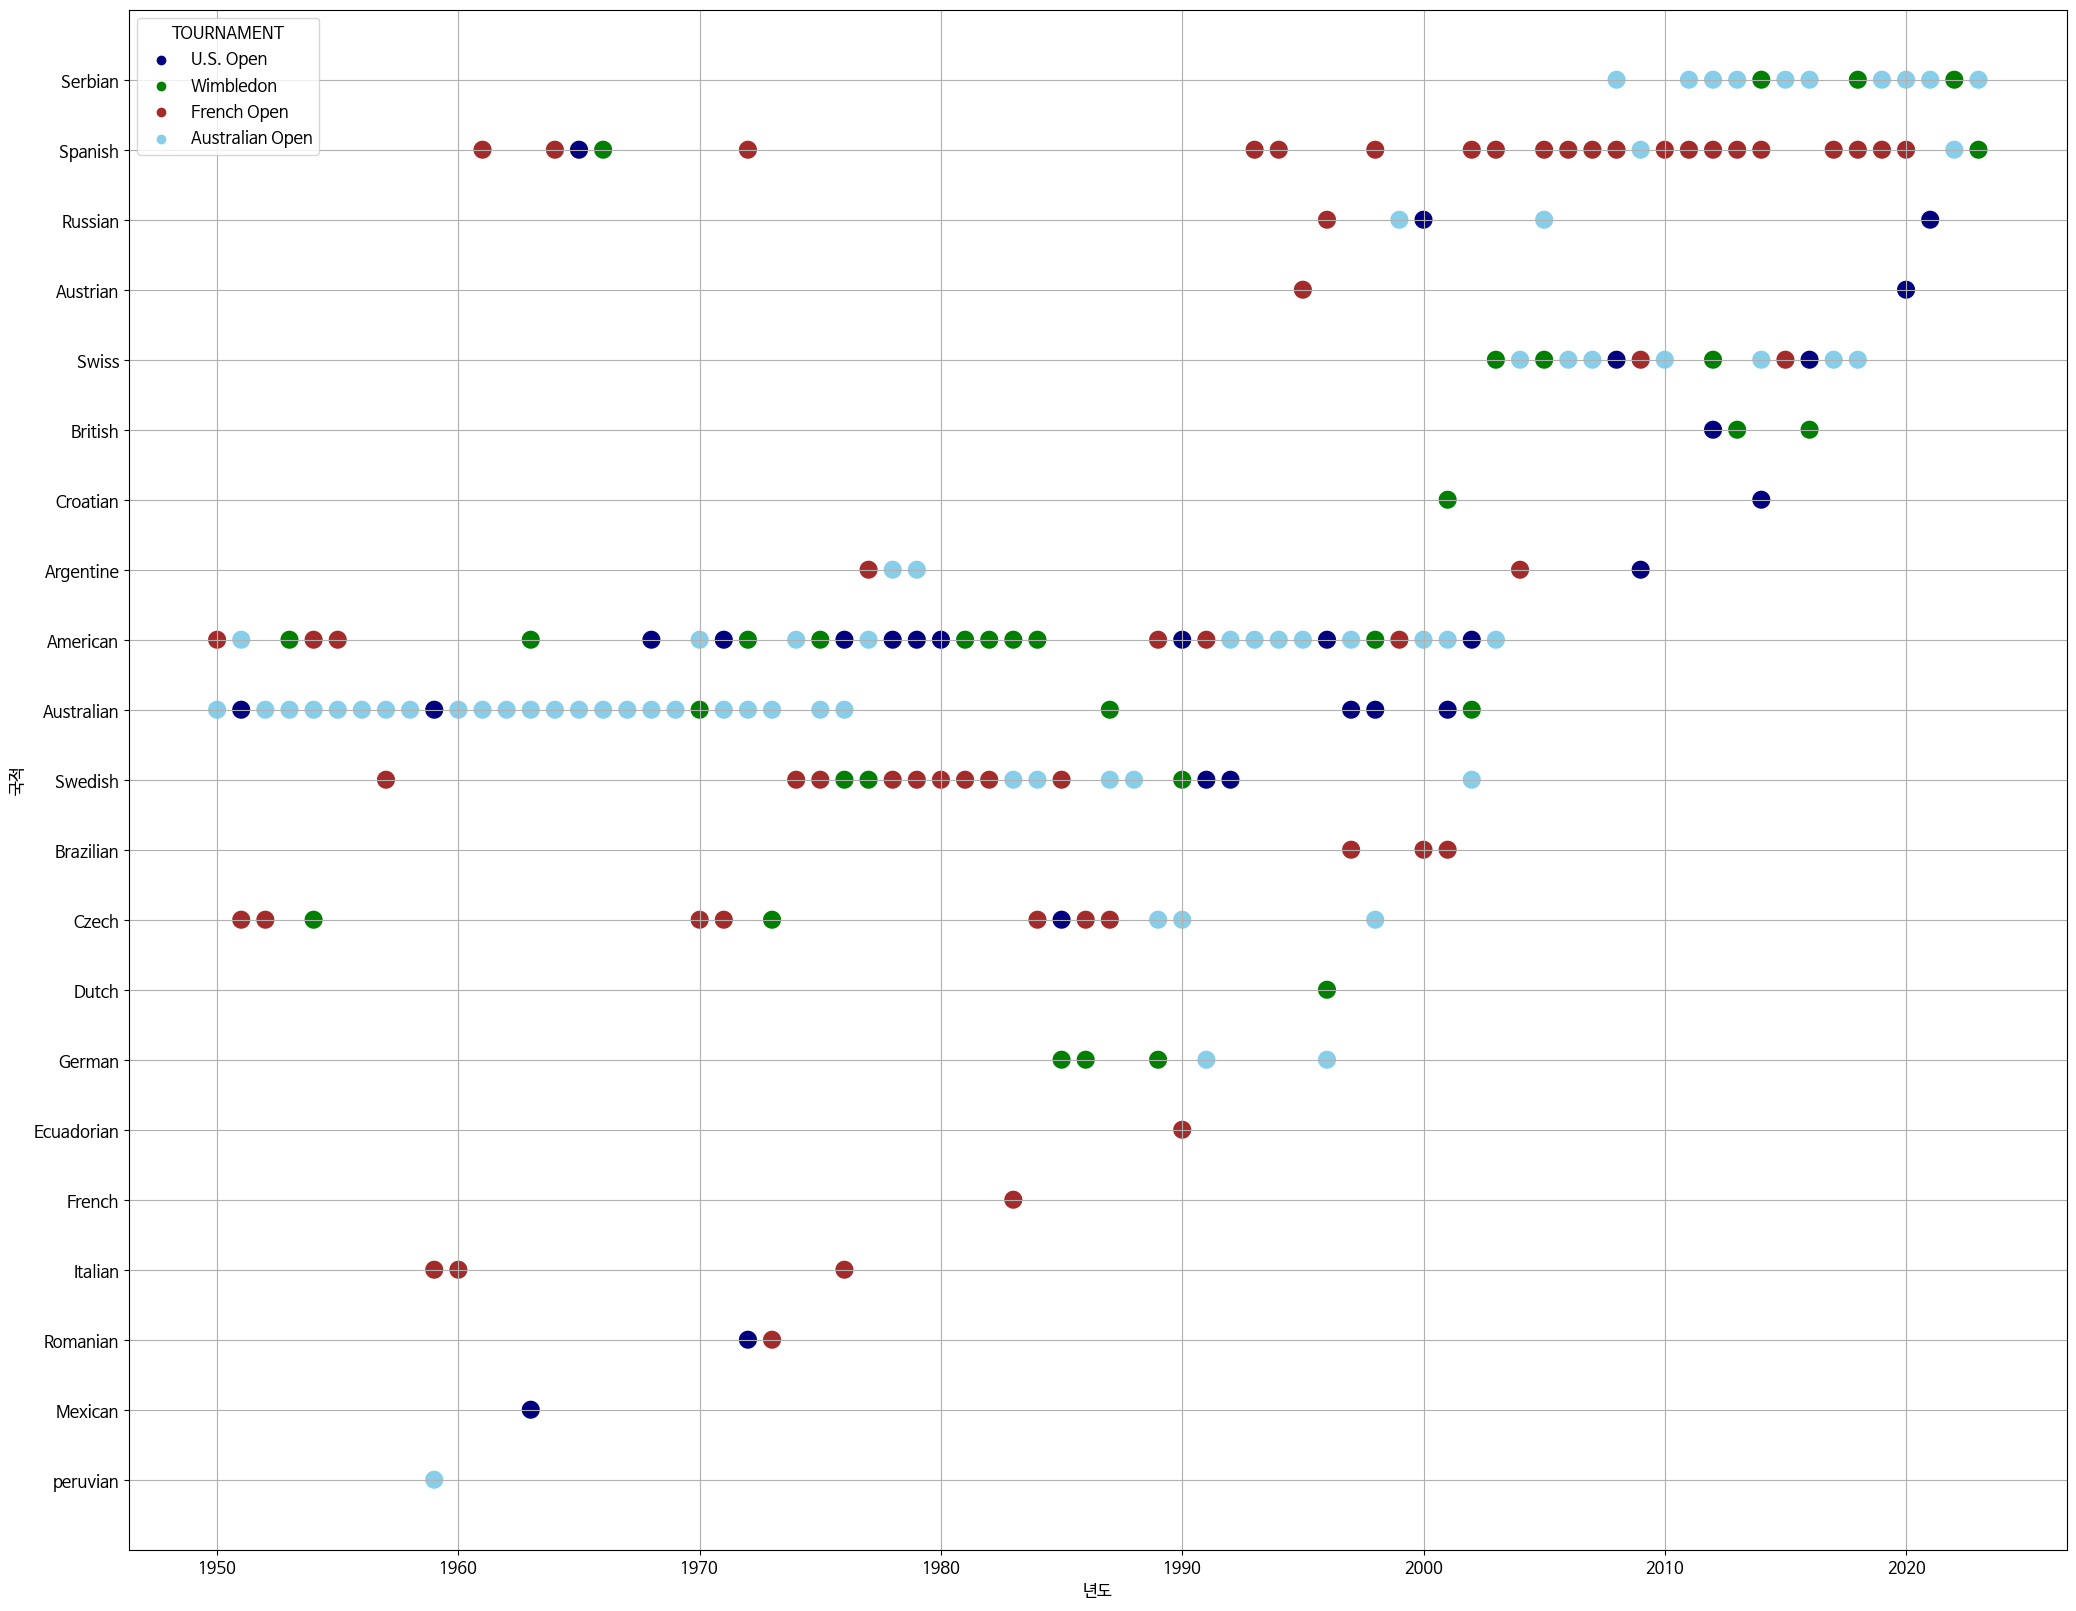

In [63]:
plt.figure(figsize=(25,20))
plt.grid(True)

sns.scatterplot(data=df, x='YEAR', y='WINNER_NATIONALITY',hue="TOURNAMENT", s=200, palette=['navy', 'green', 'brown', 'skyblue'])
plt.ylabel("국적")
plt.xlabel("년도")
plt.plot()